In [1]:
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np


In [4]:
# training in build dataset

dataset= tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = dataset.load_data()

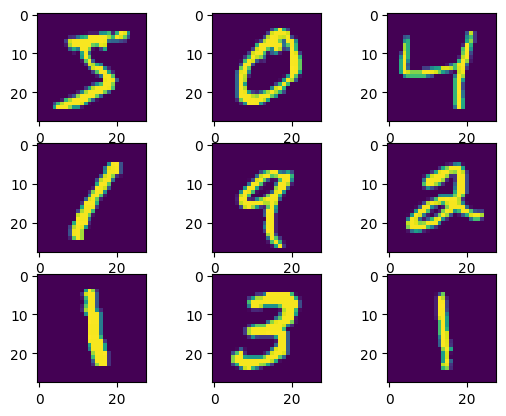

In [5]:
#plotting  random 9 images form mnist dataset

for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(training_images[i])

In [6]:

# checking data how is in matrix form

print(training_images.shape)
print(training_images[1])

(60000, 28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253
  159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252
  252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239
  233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202
   84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 16

In [7]:
# scaling image into 0 to 1 by dividing 255.0

training_images = training_images / 255.0
test_images = test_images / 255.0

In [8]:
#build neural network

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),     #input layer
                                tf.keras.layers.Dense(128, activation='relu'),    #relu give +ve output and ignore -ve
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])  # output layer


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])



In [11]:
from datetime import datetime

# training model only for training set

model.fit(training_images, training_labels, epochs=5)
duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9894 - loss: 0.0349
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9918 - loss: 0.0263
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9942 - loss: 0.0209
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9949 - loss: 0.0172
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9948 - loss: 0.0167


NameError: name 'start' is not defined

training accuracy is 99%

In [12]:
# to check tetsing accuracy

print(model.evaluate(test_images,test_labels))
#print(model.predict(test_images[0]))


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9737 - loss: 0.0970
[0.08334778249263763, 0.9768000245094299]


tetsing accurcay is 97%

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
2


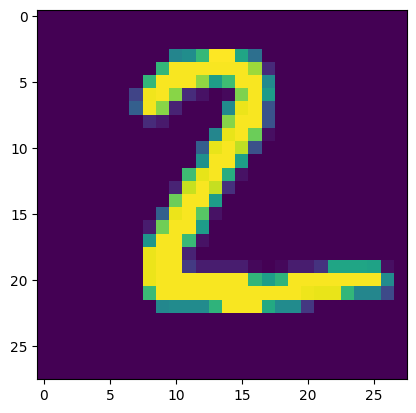

In [13]:
# checking the predicting the model working well or not


plt.imshow(test_images[1])
prediction=model.predict(test_images)
print(np.argmax(prediction[1]))

the model predicting correct

In [14]:
print(test_images[1])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.45490196 0.49019608
  0.6705882

In [16]:

# make the predictions for all the x_test

y_preds = model.predict(training_images)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


In [17]:
y_preds.shape

(60000, 10)

In [18]:

y_preds[0]

array([3.0620444e-13, 4.8572455e-11, 4.7775242e-09, 1.0196093e-03,
       1.3012826e-29, 9.9898034e-01, 1.7513850e-17, 1.4157986e-13,
       2.5084254e-11, 2.0272509e-11], dtype=float32)

In [19]:

## changing the prediciotn probability to class labels

label_for_first_image = np.argmax(y_preds[0])  # index of the max number into an array we use argmax
label_for_first_image
# this is the correct predictions made by the model and which has given us the max value as 7 index

5

In [20]:
#Converting the prediction probability for the class label
y_preds_label = [np.argmax(i) for i in y_preds]

# y_preds_label


In [21]:

y_preds   # this is the prediction probability

array([[3.0620444e-13, 4.8572455e-11, 4.7775242e-09, ..., 1.4157986e-13,
        2.5084254e-11, 2.0272509e-11],
       [1.0000000e+00, 1.9809908e-16, 3.5337406e-09, ..., 2.9981985e-14,
        4.3478659e-14, 4.3456381e-09],
       [1.3220801e-14, 5.5435776e-06, 1.3018863e-06, ..., 3.5362154e-06,
        4.4151691e-09, 5.8276072e-07],
       ...,
       [1.7534418e-15, 7.4464098e-12, 2.0892495e-15, ..., 7.1958916e-16,
        2.6721789e-09, 5.0287247e-10],
       [9.3361386e-08, 2.6082525e-10, 5.2360409e-08, ..., 1.0622942e-06,
        3.0796801e-10, 3.9494672e-13],
       [2.4262749e-06, 8.4956167e-09, 1.1700501e-07, ..., 3.6374502e-07,
        9.9999428e-01, 2.4536089e-06]], dtype=float32)